In [59]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt


In [60]:
np.random.seed(42)

mu = 0.0
sigma = 1.15
N= 51
N_T = 100
kMax = 20
f_exact = lambda x : x*x

x_0 = 0.5

In [61]:
X_train = dict()
y_train = dict()
f_exact_train = dict()
epsilon_train = dict()

errors = np.zeros(kMax)
biasSqs = np.zeros(kMax)
noises = np.zeros(kMax)
variances = np.zeros(kMax)
noise_variances = np.zeros(kMax)

In [65]:
for t in range(N_T):
    X_train[t] = (np.random.rand(N,1)*8.0)-4.0
    X_train[t] = X_train[t].reshape(1,-1)
    X_train[t] = np.sort(X_train[t])
    X_train[t] = X_train[t].reshape(N,1)
    y_train[t] = np.zeros(N)
    y_train[t] = y_train[t].reshape(-1,1)
    epsilon_train[t] = np.random.normal(mu,sigma,N)
    epsilon_train[t] = epsilon_train[t].reshape(-1,1)
    y_train[t] = f_exact(X_train[t]) + epsilon_train[t]
    f_exact_train[t] = f_exact(X_train[t])

In [66]:
neigh = dict()

for k in range(1,kMax+1):

    exact_predictions = np.zeros(N_T)

    for t in range(N_T):
        neigh[t] = KNeighborsRegressor(n_neighbors=k)
        neigh[t].fit(X_train[t], y_train[t])
        exact_predictions[t] = neigh[t].predict([[x_0]])
        
    E_T_exact_prediction = np.sum(exact_predictions) / N_T
    bias = E_T_exact_prediction - f_exact(x_0)

    noise_variance = sigma*sigma/k
    Var_T_exact_prediction = np.sum((exact_predictions - E_T_exact_prediction)**2) / (N_T-1)
    variance = Var_T_exact_prediction + noise_variance
    
    error = sigma*sigma + bias*bias + variance

    errors[k-1]=error
    biasSqs[k-1]=bias*bias
    variances[k-1]=variance
    noises[k-1]=sigma*sigma
#    noise_variances[k-1]=noise_variance

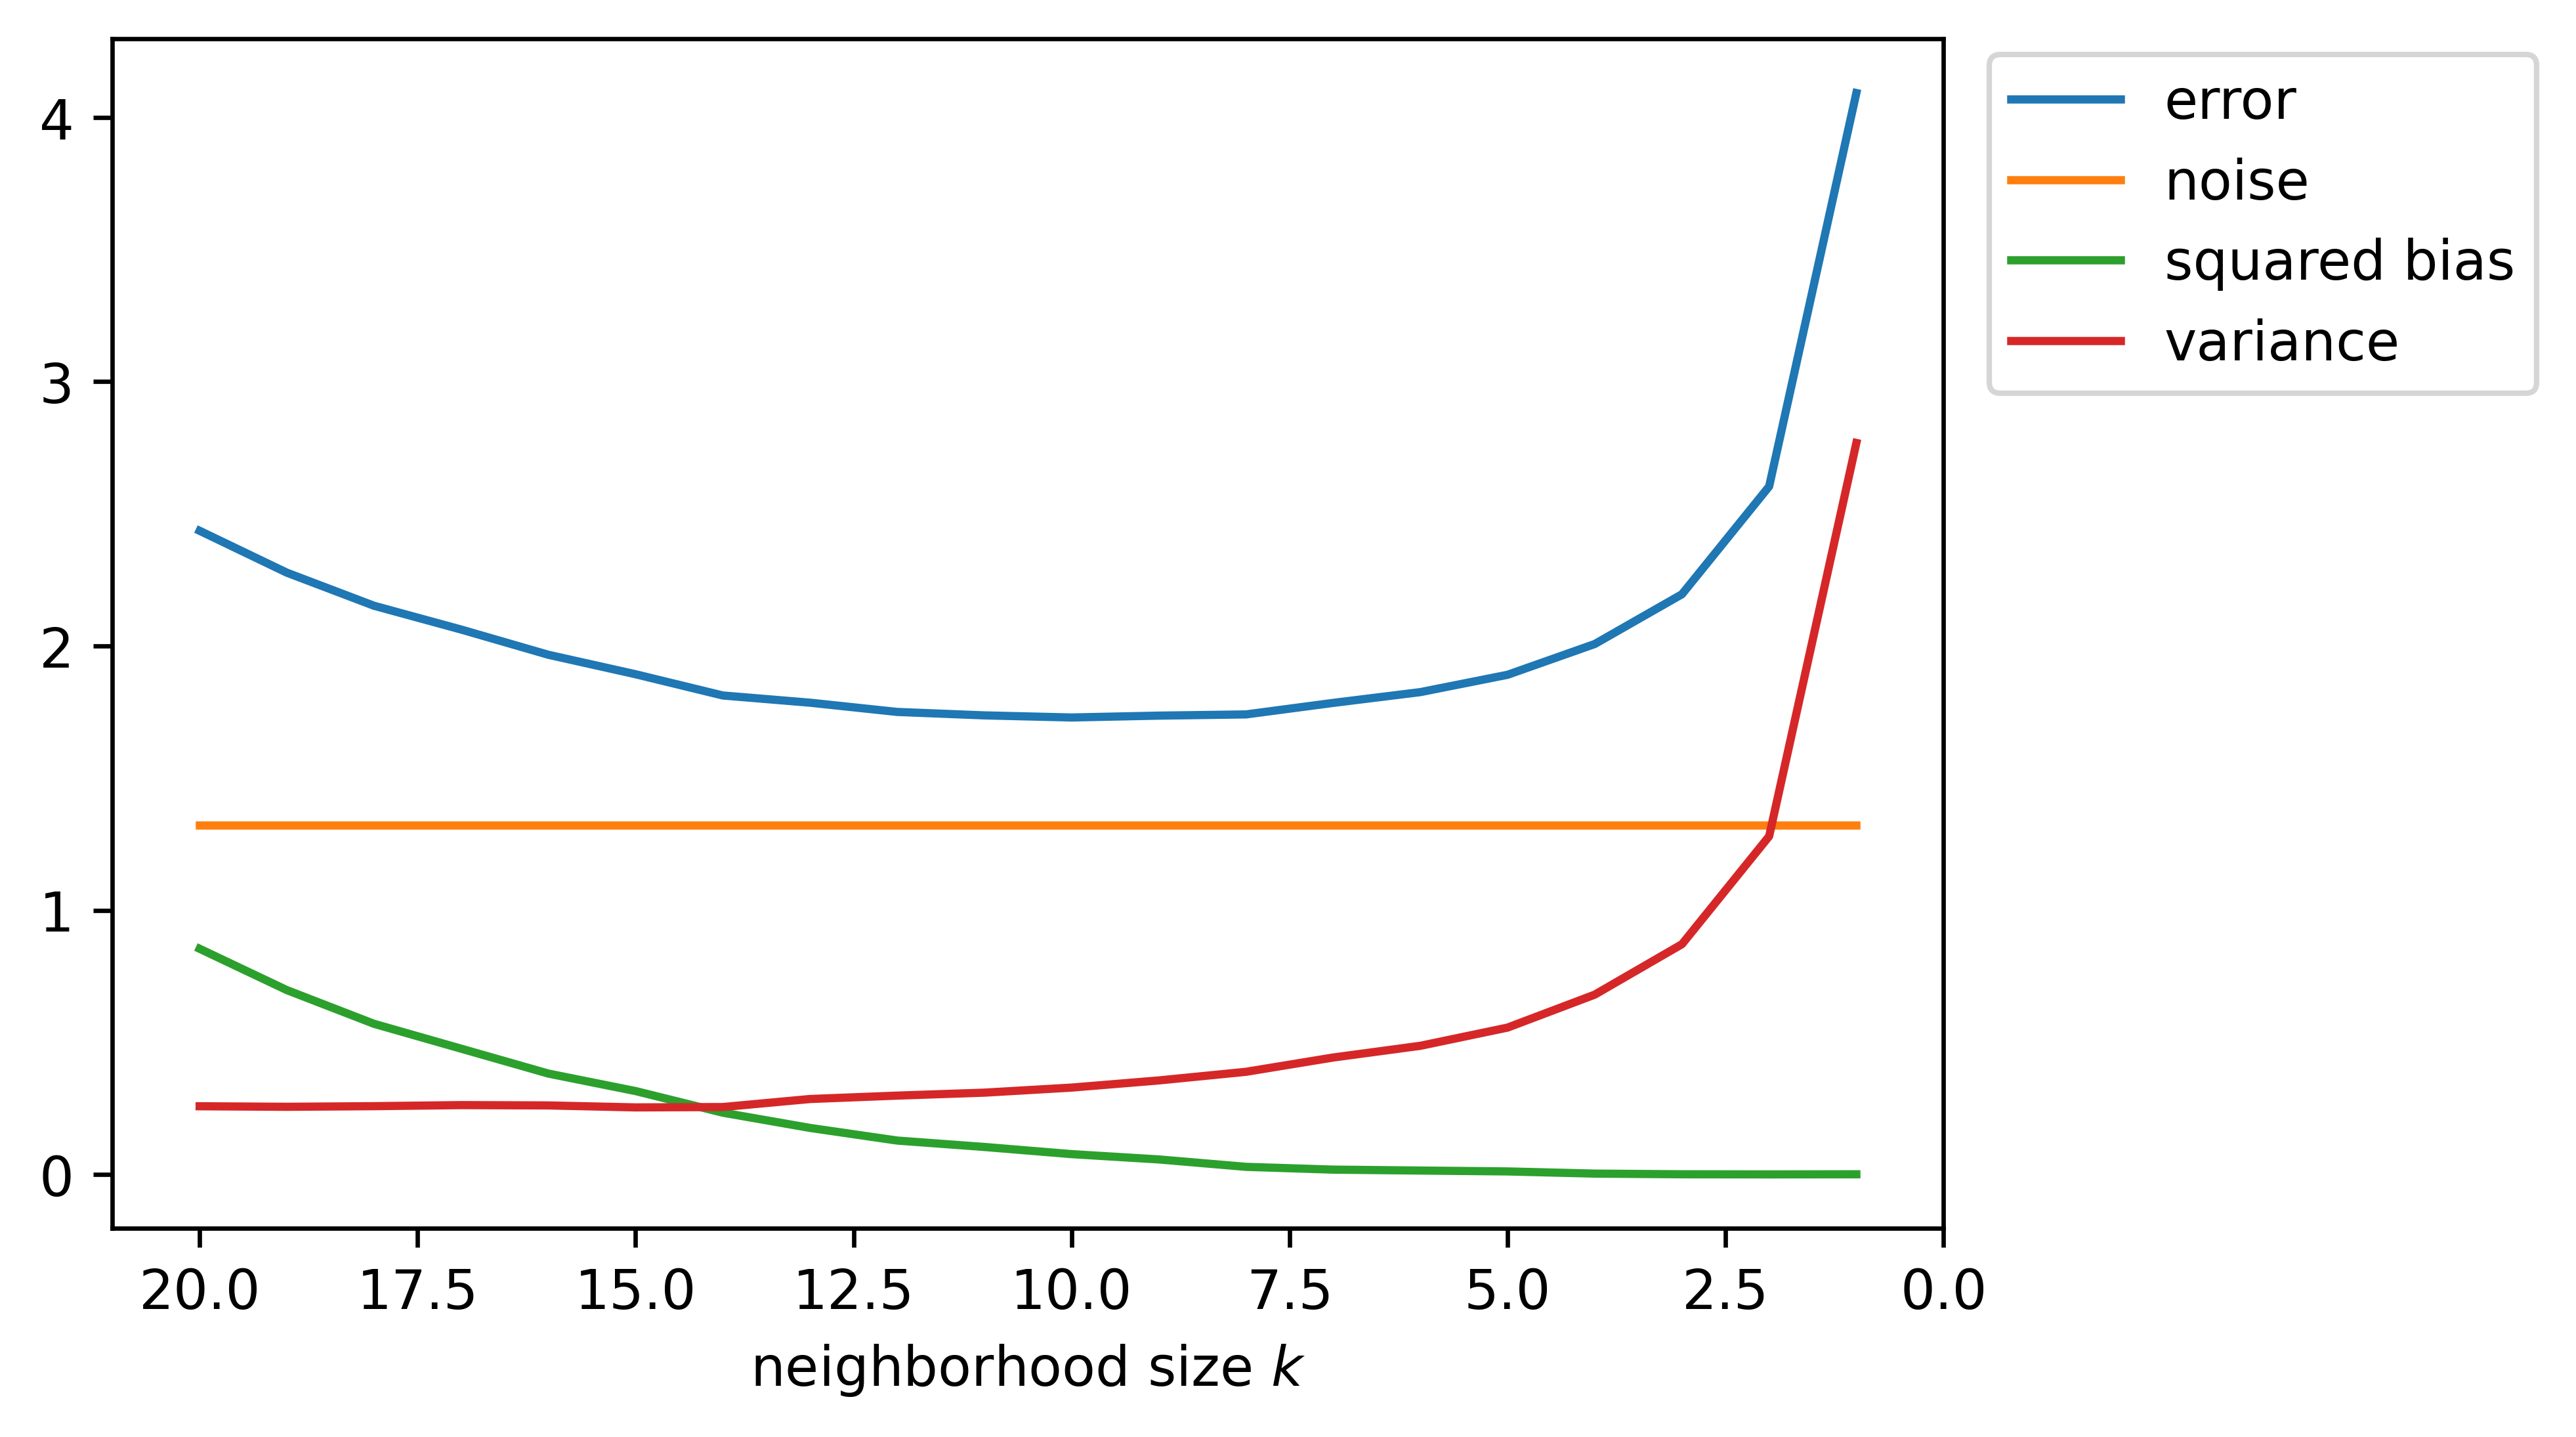

In [67]:
plt.figure(dpi=600)
plt.xlim(21,0)
plt.plot(np.linspace(1,kMax,kMax),errors, label="error")
plt.plot(np.linspace(1,kMax,kMax),noises, label="noise")
plt.plot(np.linspace(1,kMax,kMax),biasSqs, label="squared bias")
plt.plot(np.linspace(1,kMax,kMax),variances, label="variance")
#plt.plot(np.linspace(1,kMax,kMax),noise_variances, label="noise variance")
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.xlabel("neighborhood size $k$")
plt.show()

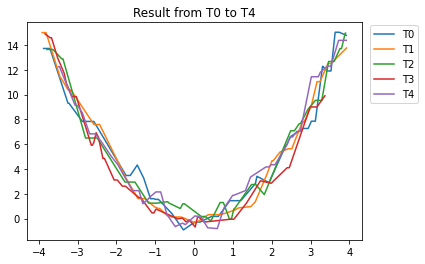

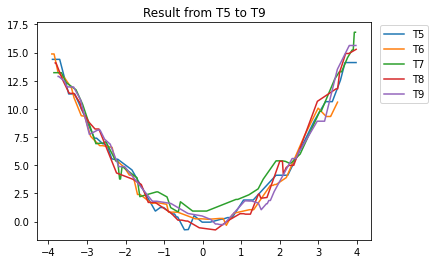

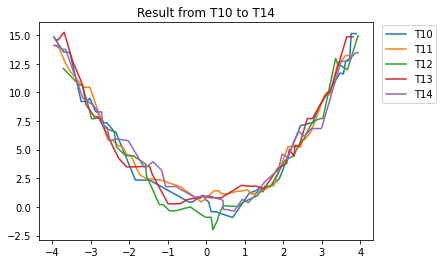

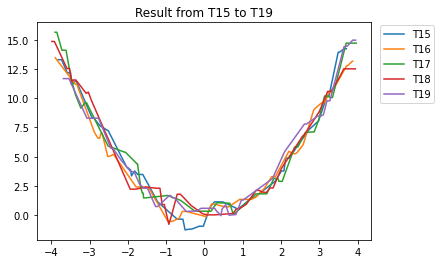

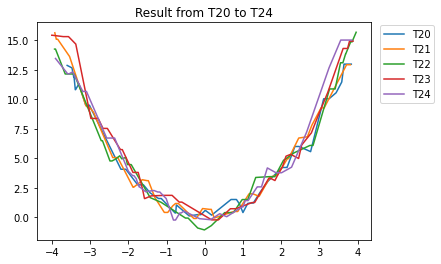

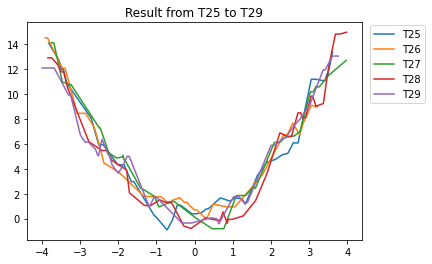

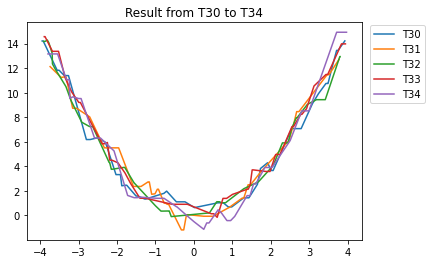

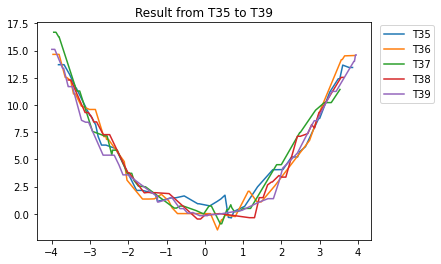

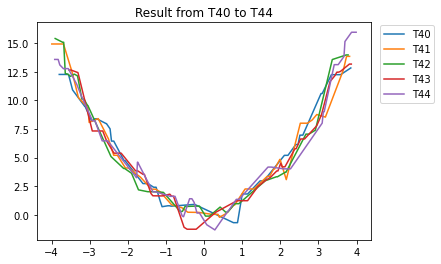

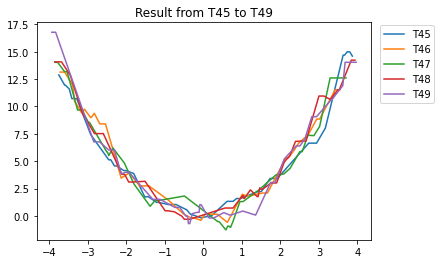

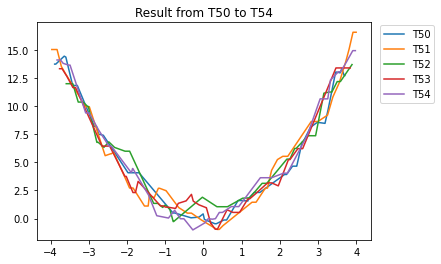

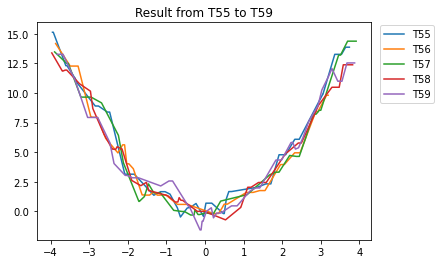

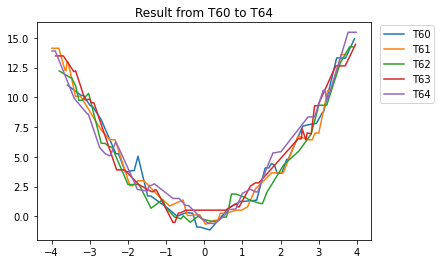

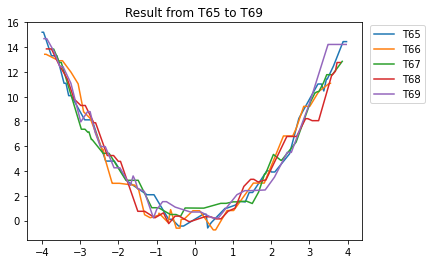

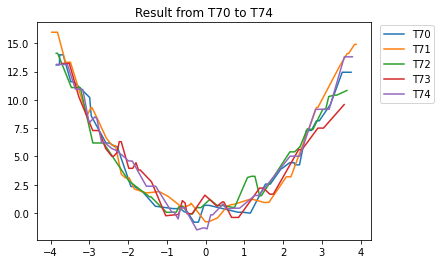

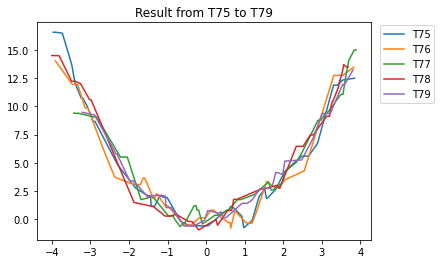

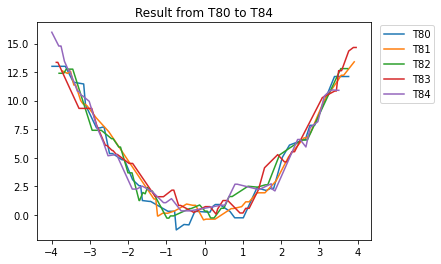

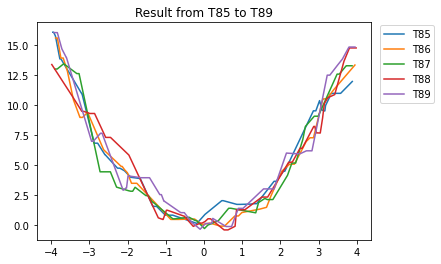

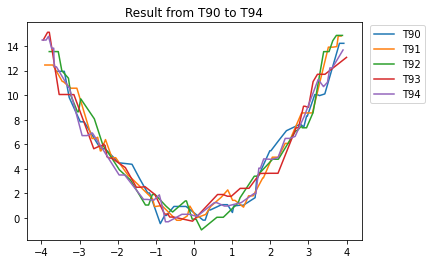

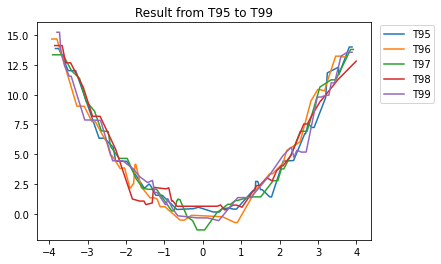

In [83]:
exact_predictions = dict()

neigh2 = dict()
ax = None

for t in range(N_T):
    neigh2[t] = KNeighborsRegressor(n_neighbors=3)
    neigh2[t].fit(X_train[t], y_train[t])
    exact_predictions[t] = neigh2[t].predict(X_train[t])
    if((t + 1) % 5 == 0):
        fig, ax = plt.subplots()
        ax.plot(X_train[t-4], exact_predictions[t-4], label = f"T{t - 4}")
        ax.plot(X_train[t-3], exact_predictions[t-3], label = f"T{t - 3}")
        ax.plot(X_train[t-2], exact_predictions[t-2], label = f"T{t - 2}")
        ax.plot(X_train[t-1], exact_predictions[t-1], label = f"T{t - 1}")
        ax.plot(X_train[t], exact_predictions[t], label = f"T{t}")
        ax.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
        ax.set_title(f'Result from T{t-4} to T{t}')